<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [38]:
import os 
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.utils import shuffle
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

Image_Size = (150,150)

print(class_names_label)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
def Load_Train():
    dataset = r'D:\Ahmed\Study\Instant\Private Study Hard\Me\AI Projects\2- Deep Learning\Intel Image Classification\seg_train\seg_train'

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
       
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)    
            
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
            image = cv2.resize(image , Image_Size)

            Images.append(image)
            Labels.append(class_names_label[folder])

    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)    

(train_image , train_label) = Load_Train()

  0%|          | 0/2191 [00:00<?, ?it/s]

100%|██████████| 2382/2382 [00:16<00:00, 145.21it/s]


In [4]:
def Load_Test():
    dataset = r'D:\Ahmed\Study\Instant\Private Study Hard\Me\AI Projects\2- Deep Learning\Intel Image Classification\seg_test\seg_test'

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
       
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)    
            
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,Image_Size)

            Images.append(image)
            Labels.append(class_names_label[folder])

    Images = np.array(Images,dtype='float32')
    Labels = np.array(Labels,dtype='int32')

    return (Images , Labels)    

(test_image, test_label) = Load_Test()

100%|██████████| 501/501 [00:03<00:00, 148.02it/s]


#### Shuffel Training Image

In [5]:
train_image , train_label = shuffle(train_image , train_label , random_state= 25)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>

#### Number of Images

In [6]:
print(f"Number of Training Images {train_label.shape[0]}")
print(f"Number of Testing Images {test_label.shape[0]}")
print(f"Size of Images {Image_Size}")

Number of Training Images 14034
Number of Testing Images 3000
Size of Images (150, 150)


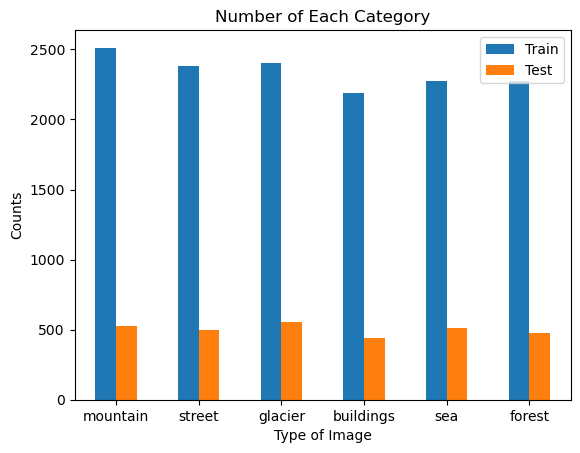

In [7]:
_ , train_counts = np.unique(train_label , return_counts = True)
_ , test_counts = np.unique(test_label , return_counts = True)

df = pd.DataFrame({'Train':train_counts,
              'Test':test_counts},index = class_names)

df.plot.bar()
plt.xticks(rotation = 0)
plt.title('Number of Each Category')
plt.ylabel('Counts')
plt.xlabel('Type of Image')
plt.show()

In [66]:
df

Train  Test
mountain    2512   525
street      2382   501
glacier     2404   553
buildings   2191   437
sea         2274   510
forest      2271   474

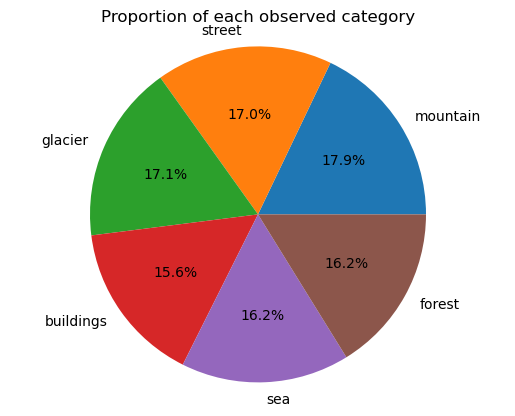

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

#### Normalization

In [10]:
train_image = train_image / 255.0
test_image = test_image / 255.0

#### Images In Dataset

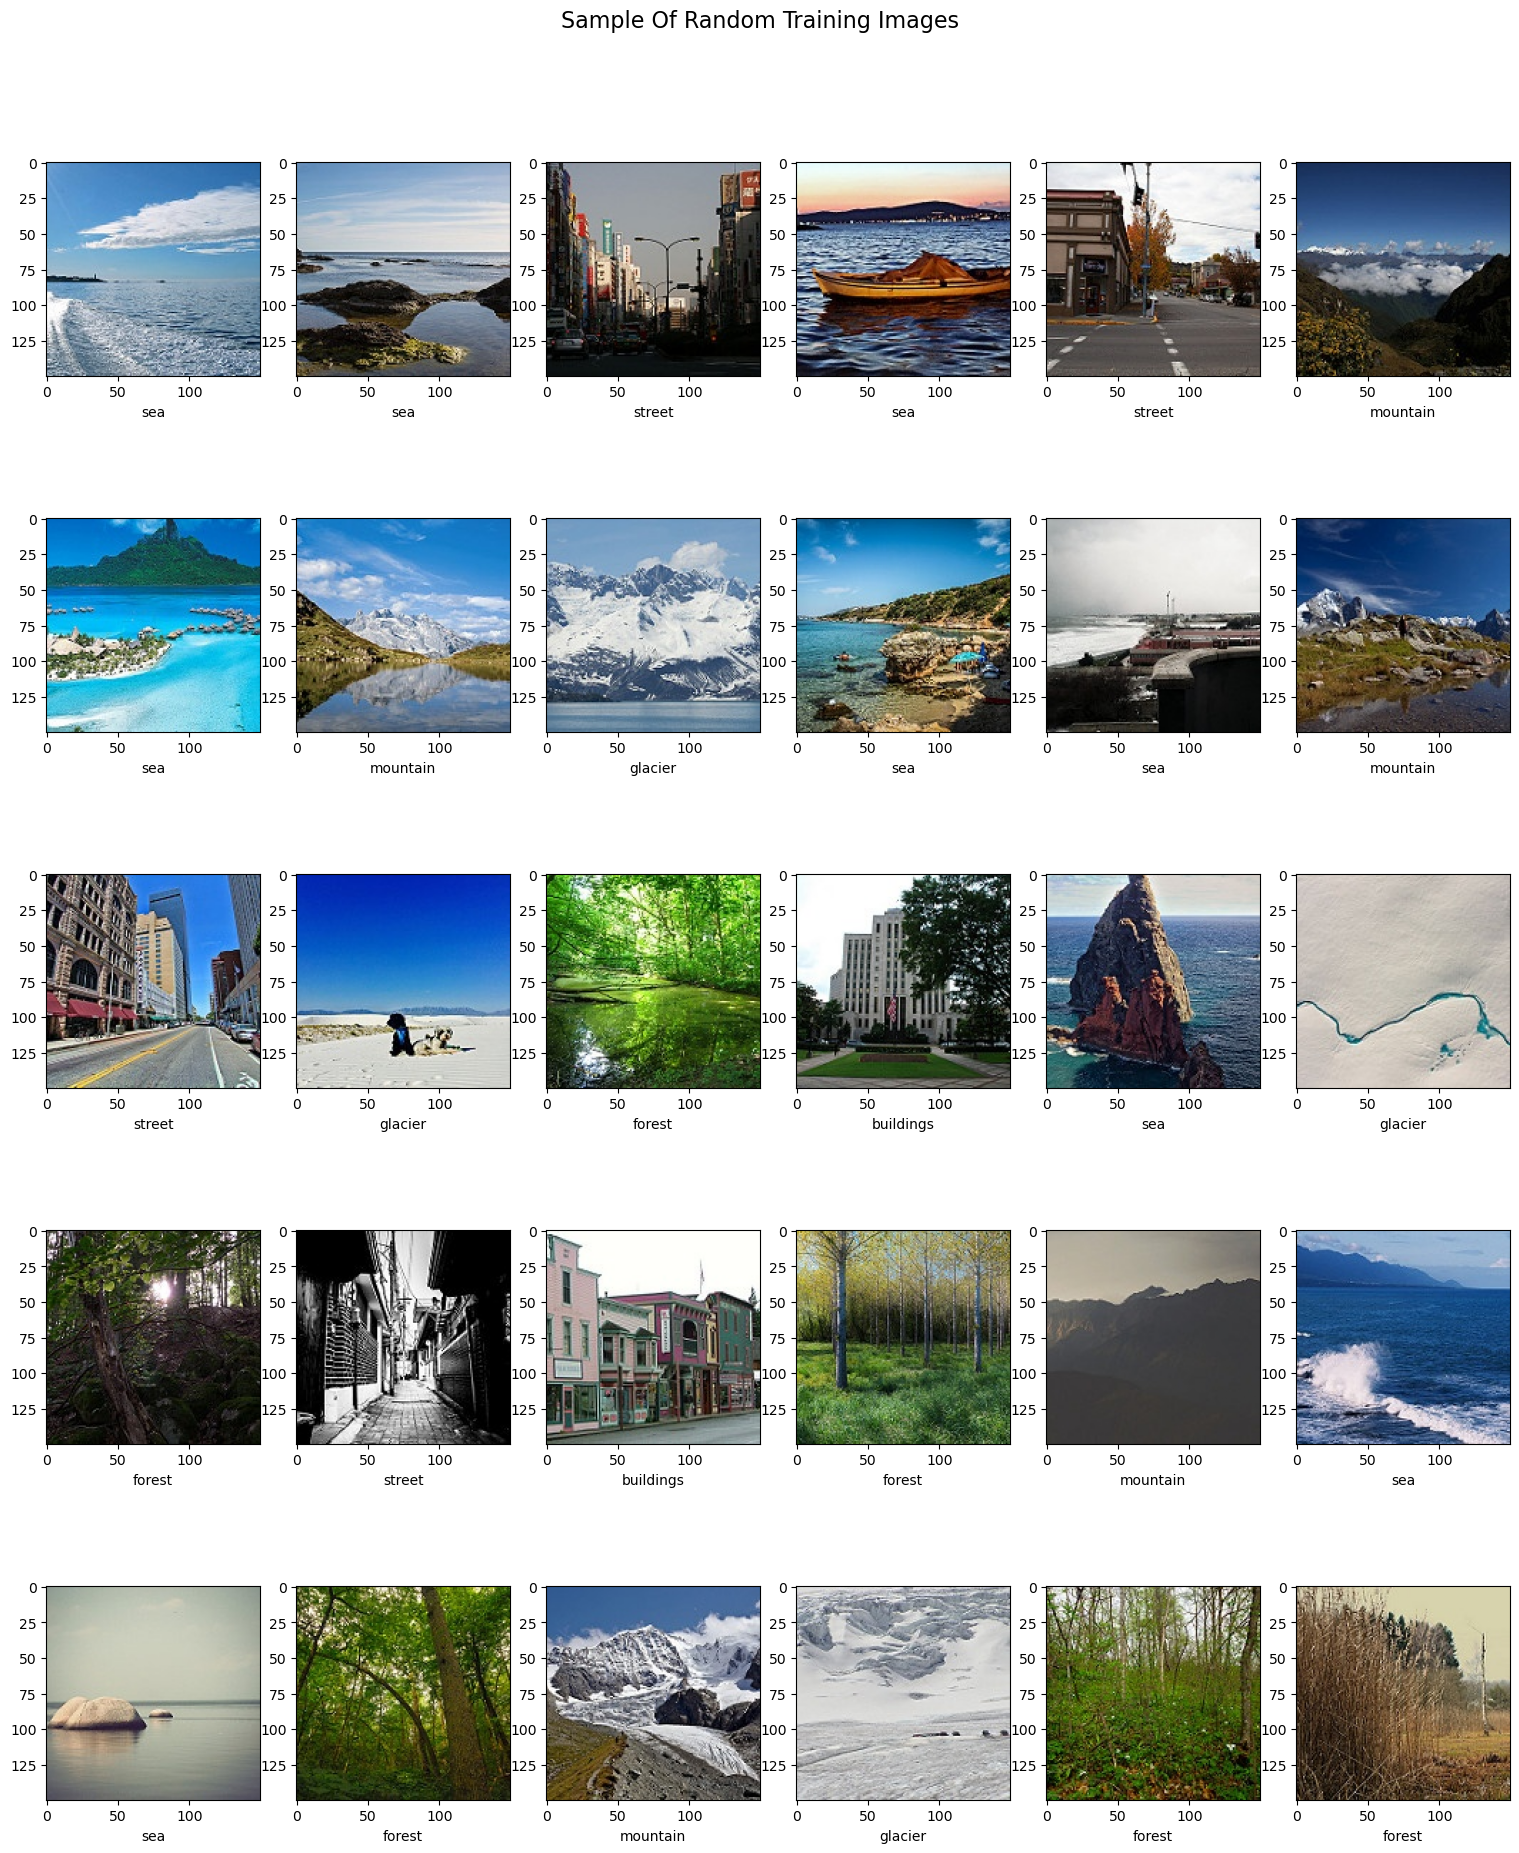

In [17]:
plt.figure(figsize=(15,20))
plt.suptitle("Sample Of Random Training Images" , fontsize=16)

for i in range(30):
    plt.subplot(5,6,i+1)
    idx = np.random.randint(0 , len(train_label)-1)
    plt.imshow(train_image[idx])
    plt.xlabel(f'{class_names[train_label[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)
    

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Modeling</h2>
</div>

In [29]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(Image_Size[0], Image_Size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])


In [30]:
KerasModel.compile(optimizer = 'adamax', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = KerasModel.fit(train_image, train_label, batch_size=200, epochs=50, validation_split = 0.2,
                         callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
57/57 [==============================] - 86s 1s/step - loss: 1.2303 - accuracy: 0.5323 - val_loss: 0.9540 - val_accuracy: 0.6345
Epoch 2/50
57/57 [==============================] - 72s 1s/step - loss: 0.8749 - accuracy: 0.6658 - val_loss: 0.7605 - val_accuracy: 0.7168
Epoch 3/50
57/57 [==============================] - 71s 1s/step - loss: 0.7354 - accuracy: 0.7315 - val_loss: 0.6997 - val_accuracy: 0.7271
Epoch 4/50
57/57 [==============================] - 71s 1s/step - loss: 0.6557 - accuracy: 0.7634 - val_loss: 0.6876 - val_accuracy: 0.7442
Epoch 5/50
57/57 [==============================] - 71s 1s/step - loss: 0.5916 - accuracy: 0.7883 - val_loss: 0.7386 - val_accuracy: 0.7442
Epoch 6/50
57/57 [==============================] - 71s 1s/step - loss: 0.5559 - accuracy: 0.7989 - val_loss: 0.6041 - val_accuracy: 0.7870
Epoch 7/50
57/57 [==============================] - 71s 1s/step - loss: 0.4978 - accuracy: 0.8253 - val_loss: 0.5434 - val_accuracy: 0.8080
Epoch 8/50
57/57 [==

#### Summary of KerasModel

In [32]:
print(KerasModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 128)      

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluating</h2>
</div>

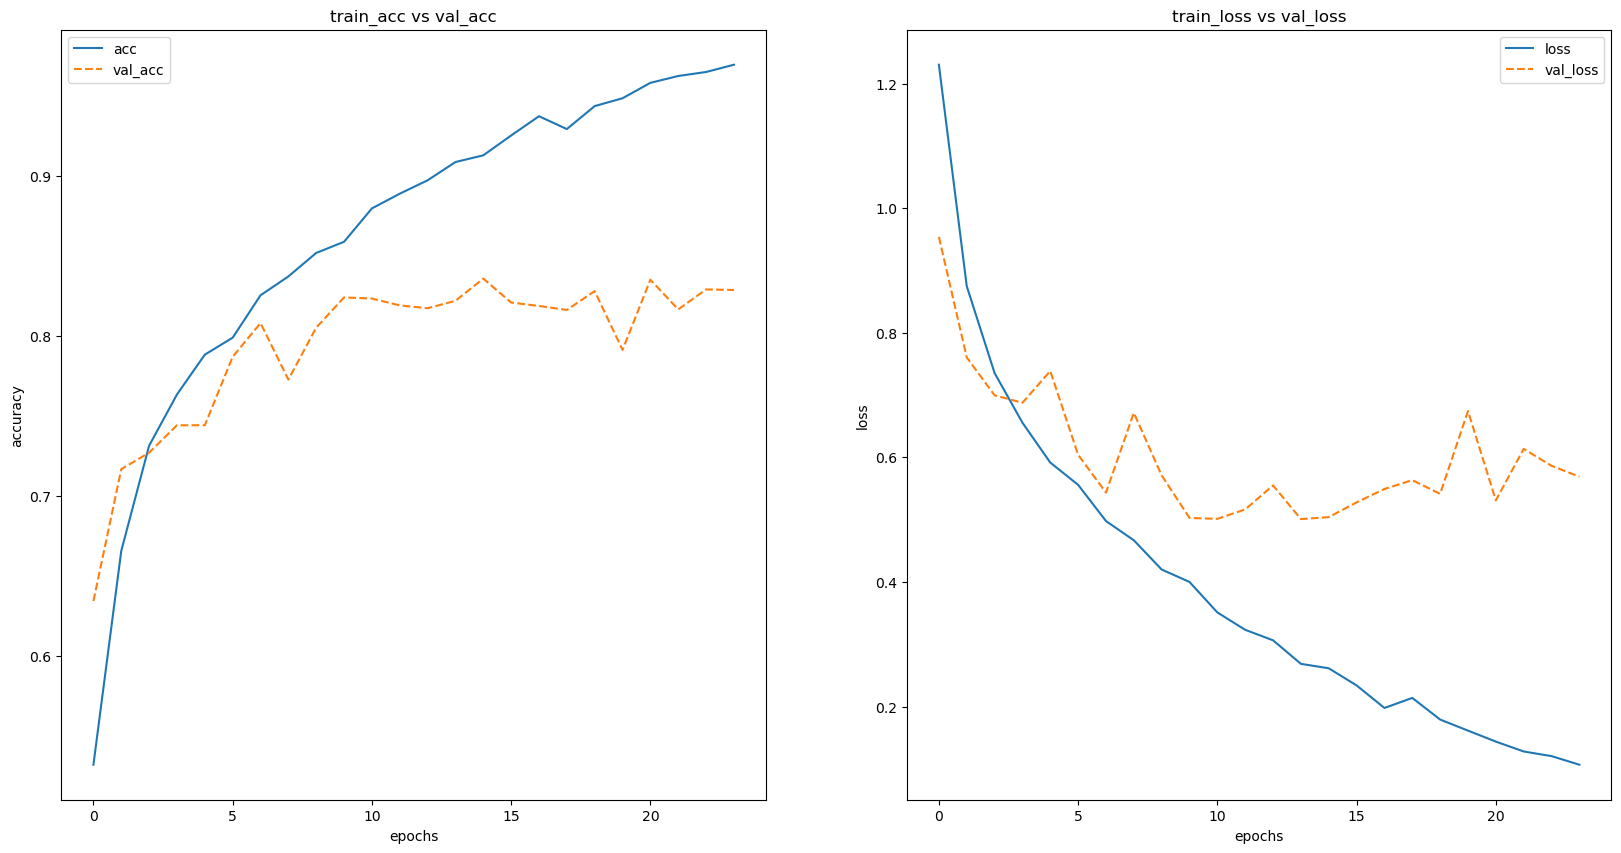

In [33]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)    

In [34]:
KerasModel.evaluate(test_image,test_label)

94/94 [==============================] - 6s 60ms/step - loss: 0.4958 - accuracy: 0.8283


[0.4958091676235199, 0.82833331823349]

In [35]:
predictions = KerasModel.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

94/94 [==============================] - 6s 57ms/step


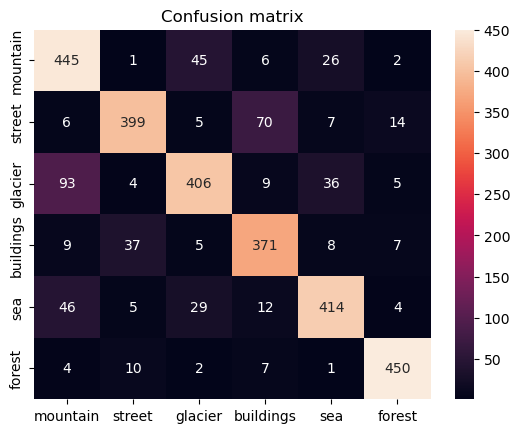

In [36]:
CM = confusion_matrix(test_label, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels = class_names, 
           yticklabels = class_names,
           ax = ax,
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [42]:
print(classification_report(test_label, pred_labels,target_names = class_names))

              precision    recall  f1-score   support

    mountain       0.74      0.85      0.79       525
      street       0.88      0.80      0.83       501
     glacier       0.83      0.73      0.78       553
   buildings       0.78      0.85      0.81       437
         sea       0.84      0.81      0.83       510
      forest       0.93      0.95      0.94       474

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting</h2>
</div>

#### Load Predict Images

In [27]:
def Load_Predict():
    dataset = r'D:\Ahmed\Study\Instant\Private Study Hard\Me\AI Projects\2- Deep Learning\Intel Image Classification\seg_pred\seg_pred'
    
    predict_image = []

    for file in tqdm(os.listdir(dataset)):
        image_path = os.path.join(dataset,file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,Image_Size)
        predict_image.append(image)
    
    predict_image = np.array(predict_image , dtype = 'float32')

    return predict_image

predict_image = Load_Predict()

100%|██████████| 7301/7301 [01:00<00:00, 120.46it/s]


In [45]:
predict_image_pred = KerasModel.predict(predict_image)
predict_image_pred = np.argmax(predict_image_pred , axis=1)
predict_image_pred

229/229 [==============================] - 13s 56ms/step


array([1, 0, 1, ..., 2, 5, 1], dtype=int64)

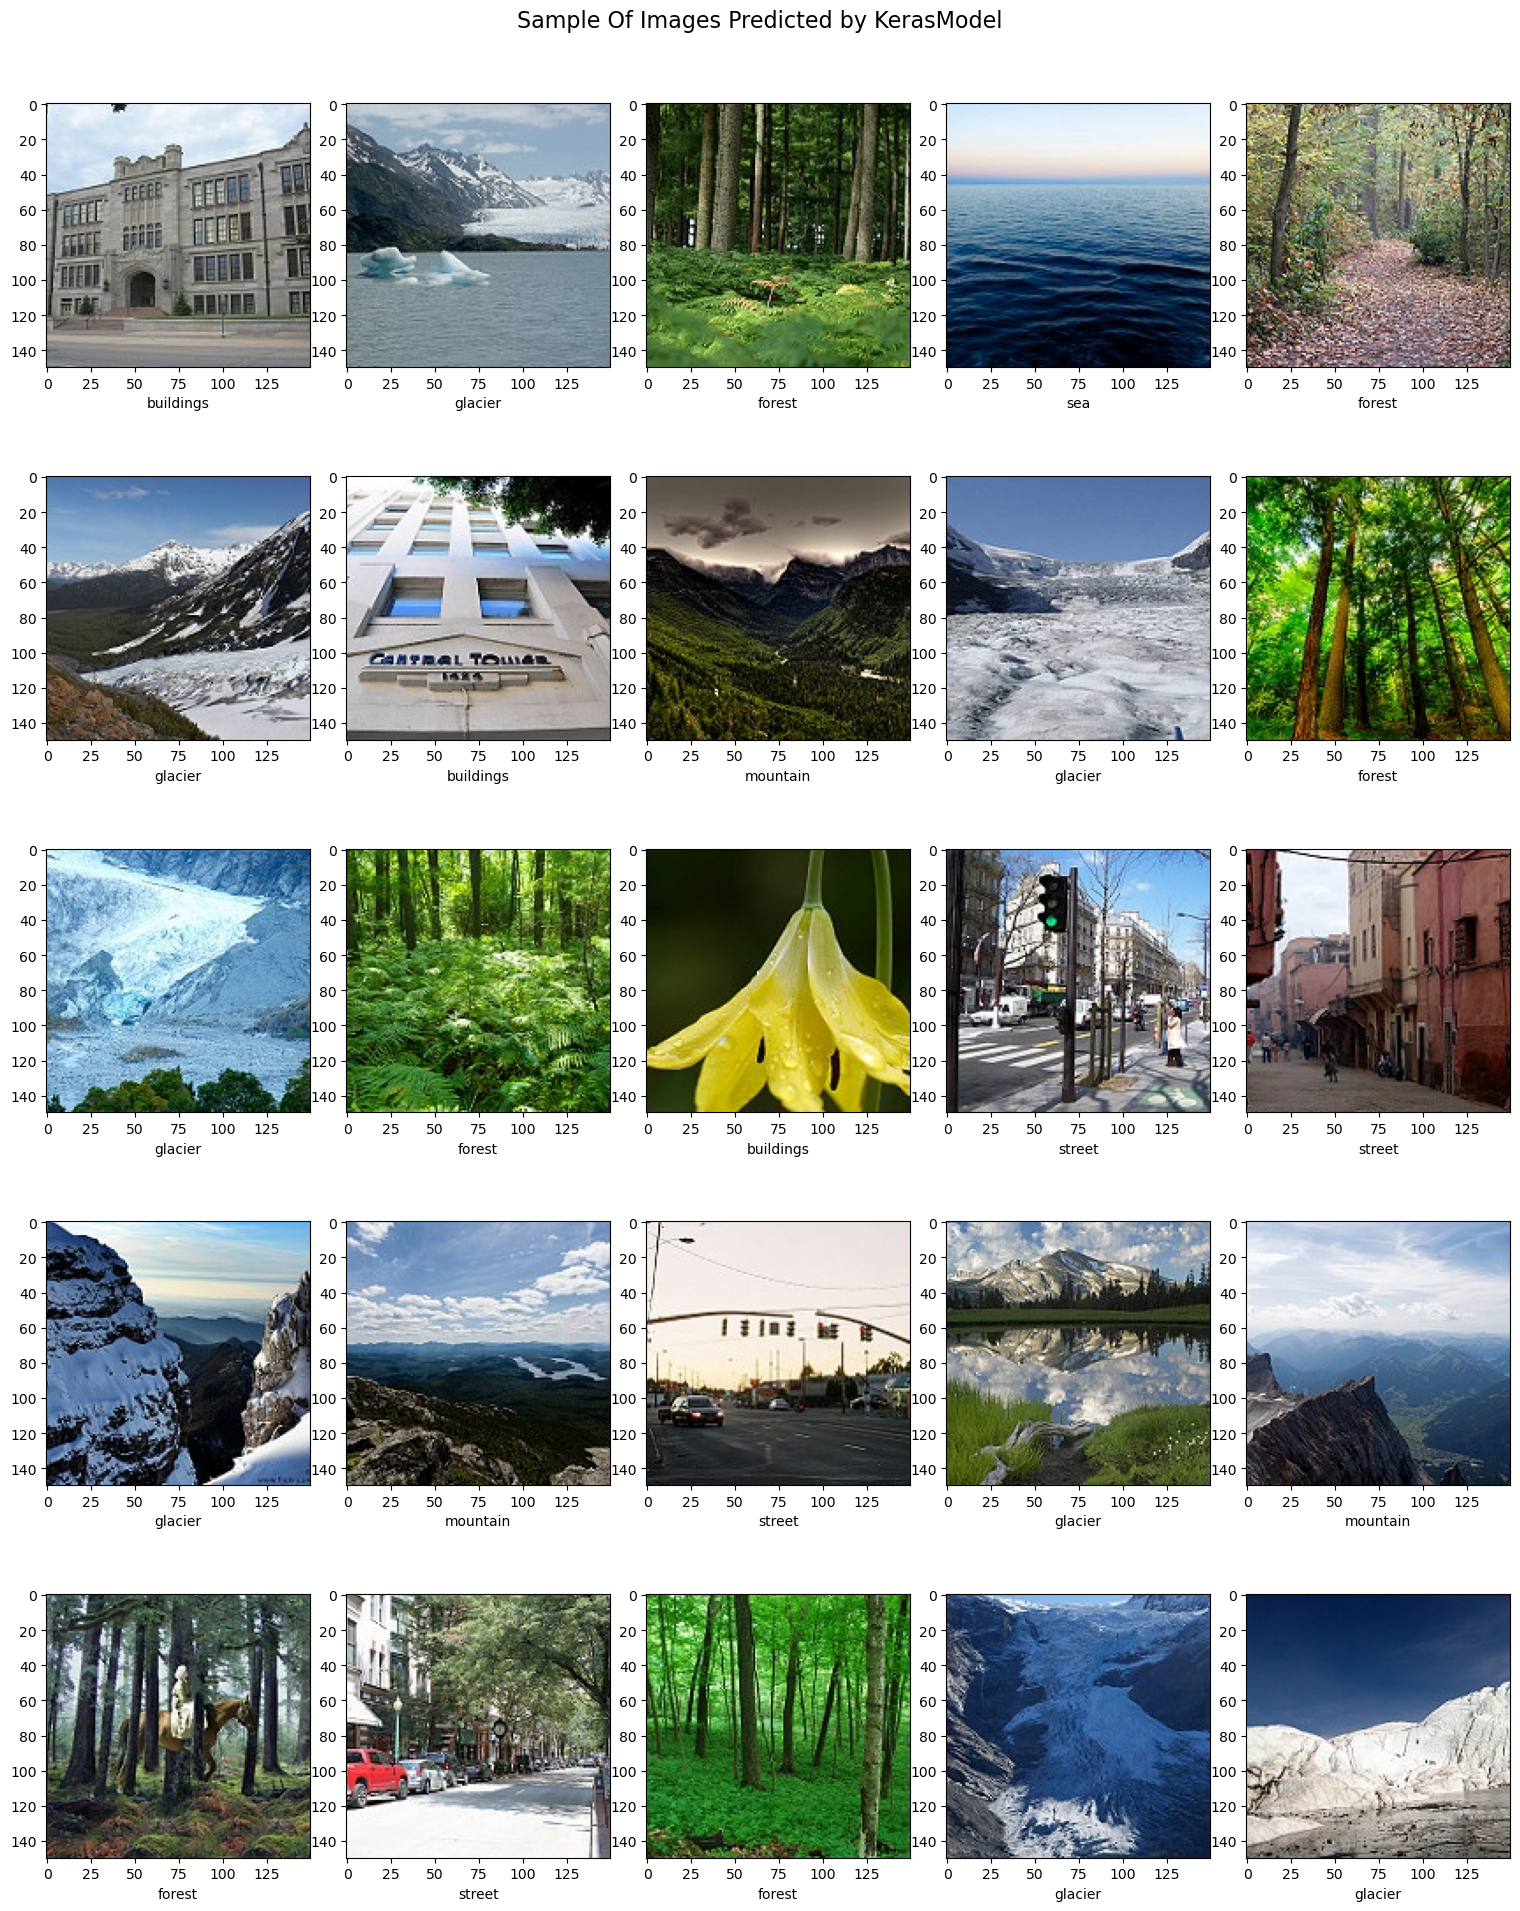

In [59]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by KerasModel" , fontsize=16)

for i in range(25):
    plt.subplot(5,5,i+1)
    idx = np.random.choice(np.arange(len(predict_image_pred)))
    plt.imshow(predict_image[idx] / 255.0)
    plt.xlabel(f'{class_names[predict_image_pred[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Save The Keras Model</h2>
</div>

#### Save Model

In [60]:
KerasModel.save('Model_intel_ACC83.h5')